In [1]:
#conda install praw -y

In [2]:
#pip install praw

In [3]:
#conda install -c conda-forge nltk -y

In [1]:
import praw
import pandas as pd

import credentials

In [5]:
#pip install credentials

In [7]:
#reddit = praw.Reddit(client_id=credentials.client_id,
                     #client_secret=credentials.client_secret,
                    # user_agent=credentials.user_agent)

In [2]:
import praw

reddit = praw.Reddit(
    client_id="ZhzPulxOcF26njmIO1vEng",
    client_secret="d8q6xXXui9cIIxleLl-ri7pQwCBfSw",
    user_agent="my user agent",
)

In [3]:
subreddit = reddit.subreddit('wallstreetbets').hot(limit=10)

In [4]:
for post in subreddit:
    print(post.title, post.score)

What Are Your Moves Tomorrow, February 09, 2022 255
Most Anticipated Earnings Releases for the week beginning February 7th, 2022 1496
Charlie Munger is doubling down on $BABA saying it’s a long term 5 year play. Bruh you’re 98 years old, there’s a high chance you’ll be dead this year… 6345
Facebook's been fired from the FAANG group. 3979
🔮WallStreetBets Predictions Tournament for February 2022🔮 17811
Facebook aka Meta, I don't like this stock 3054
Wish me luck retards 10477
SEC: "If you place a retail market order, 90-95% do not go to lit exchanges. They go to wholesalers" 1501
Please help me understand this insanity 2321
Who is bankrolling you retards? 169


In [5]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


subreddit = reddit.subreddit('wallstreetbets').hot(limit=None)

for post in list(subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [6]:
wb_df = pd.DataFrame(reddit_data)

In [26]:
#wb_df

In [31]:
import sqlite3
con = sqlite3.connect('sofi.db')

In [32]:
wb_df.to_sql('posts', con, if_exists='replace', index=False)

In [30]:
#import sqlite3

#con = sqlite3.connect("data/wb_reddits.sqlite")
#wb_df.to_sql('posts', con, if_exists='replace', index=False)

OperationalError: unable to open database file

In [33]:
wb_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
# it's best to close the connection when finished
con.close()
#wb_df_check

In [34]:
wb_df[wb_df['score'] > 20000]

,title,link,author,n_comments,score,text
2,🔮WallStreetBets Predictions Tournament for Jan...,/r/wallstreetbets/comments/s1cllr/wallstreetbe...,OPINION_IS_UNPOPULAR,402,64972,
15,Get a job at the company which you know is goi...,/r/wallstreetbets/comments/s7rwkm/get_a_job_at...,Zarnor,1068,47666,
70,And just like that you Activision bagholders h...,/r/wallstreetbets/comments/s7e361/and_just_lik...,NNT888,647,21325,
121,"If this isn't the way, I don't know what is",/r/wallstreetbets/comments/s748b6/if_this_isnt...,keenfeed,590,33241,
559,Me after taking wsb advice,/r/wallstreetbets/comments/s5bfna/me_after_tak...,Avikm289,324,37533,


In [35]:
wb_df[wb_df['score'] > 10000]['link'].to_list()

['/r/wallstreetbets/comments/s1cllr/wallstreetbets_predictions_tournament_for_january/',
 '/r/wallstreetbets/comments/s89j00/buffett_wisdom/',
 '/r/wallstreetbets/comments/s83vrd/i_want_that_pen/',
 '/r/wallstreetbets/comments/s7rwkm/get_a_job_at_the_company_which_you_know_is_going/',
 '/r/wallstreetbets/comments/s7e361/and_just_like_that_you_activision_bagholders_had/',
 '/r/wallstreetbets/comments/s748b6/if_this_isnt_the_way_i_dont_know_what_is/',
 '/r/wallstreetbets/comments/s735xy/unpopular_opinion_gme_is_headed_for_50_before_250/',
 '/r/wallstreetbets/comments/s6wknj/classic_chamath_oldie_but_goodie/',
 '/r/wallstreetbets/comments/s6nx5b/wifes_boyfriend/',
 '/r/wallstreetbets/comments/s6419d/mr_incredible_invests_in_stocks/',
 '/r/wallstreetbets/comments/s5bfna/me_after_taking_wsb_advice/']

In [36]:
wb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       602 non-null    object
 1   link        602 non-null    object
 2   author      602 non-null    object
 3   n_comments  602 non-null    int64 
 4   score       602 non-null    int64 
 5   text        602 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [37]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='score', ylabel='n_comments'>

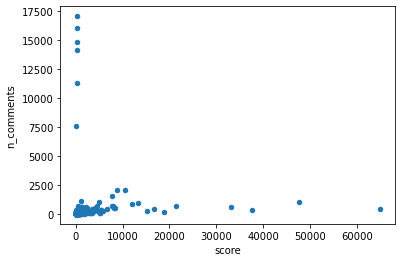

In [38]:
wb_df.plot.scatter(x='score', y='n_comments')

<AxesSubplot:>

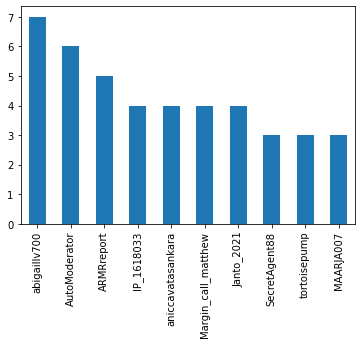

In [39]:
wb_df['author'].value_counts()[:10].plot.bar()

<AxesSubplot:>

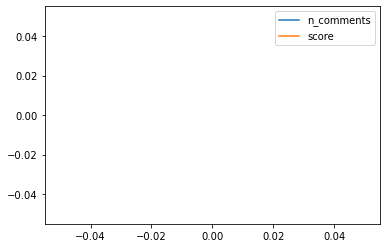

In [40]:
wb_df[wb_df['author'] == 'Bookish_Tiger'].plot()

<AxesSubplot:>

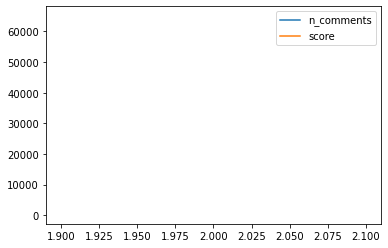

In [41]:
wb_df[wb_df['author'] == 'OPINION_IS_UNPOPULAR'].plot()

In [42]:
import nltk

fd = nltk.FreqDist(' '.join(wb_df['title']).split())

fd.most_common(5)

[('the', 159), ('to', 127), ('I', 103), ('a', 99), ('is', 86)]

In [43]:
#nltk.download('stopwords')

In [44]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops = set(stops) | set(['-', '2021','|','get','loss','$$','$$)'])

In [45]:
words = ' '.join(wb_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [46]:
stonks = []
for stocks in cleaned_words:
    if '$' in stocks:
        stonks.append(stocks)

In [47]:
stonks_num = []
stonks_num = [x for x in stonks if not any(x1.isdigit() for x1 in x)]    

In [48]:
stonks_f = []
for stock in stonks_num:
    stonks_f.append(stock.replace('$', ''))

In [49]:
clean_stonks = nltk.FreqDist(stonks_f)

In [50]:
clean_stonks.most_common(20)

[('atvi', 8),
 ('spy', 4),
 ('msft', 4),
 ('gme', 3),
 ('sofi', 2),
 ('hood', 2),
 ('dkng', 2),
 ('qqq', 2),
 ('(ag)', 1),
 ('corz', 1),
 ('rklb', 1),
 ('sony,', 1),
 ('clov', 1),
 ('bbig', 1),
 ('spce', 1),
 ('lcid', 1),
 ('coin', 1),
 ('gme?', 1),
 ('intc', 1),
 ('tsla', 1)]

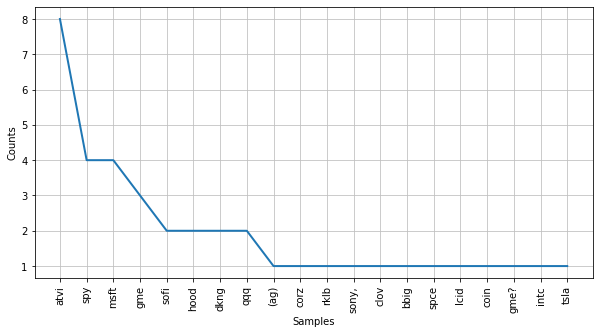

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
plt.figure(figsize=(10, 5))
clean_stonks.plot(20)

I analyzed a subreddit called Wallstreetbets. It was mentioned on the news for causing the AMC and Gamestop short squeeze early this year. I created a few plots analyzing the top authors on their score and number of comments. The author 'OPINION_IS_UNPOPULAR’ had a lot of comments with a low score and the author 'Bookish_Tiger' had a high score with less comments. I also looked at the top mentioned stocks. To do this I created a filter to sort out comments that included a $ and removed any strings that contained numbers. When talking about a stock it is common to use a $ before writing the stocks’ symbol. I found WISH;18 was the most mentioned stock followed by SDC;11 (Smile Direct Club), CLOV;5 (Clover Health) and TSLA;3 (Tesla). Overall this analysis gave me better insight into what stocks the Wallstreetbets community is talking about and which authors are more highly rated.